<a href="https://colab.research.google.com/github/fray517/ml/blob/main/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import tensorflow as tf
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

In [12]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [13]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype= "float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

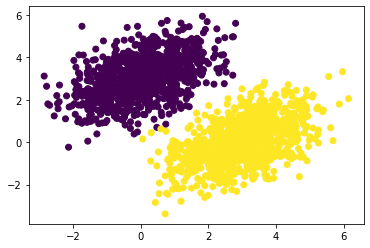

In [14]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [15]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [16]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [17]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [18]:
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [19]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.3958
Loss at step 1: 1.0706
Loss at step 2: 0.2939
Loss at step 3: 0.1712
Loss at step 4: 0.1443
Loss at step 5: 0.1321
Loss at step 6: 0.1227
Loss at step 7: 0.1144
Loss at step 8: 0.1068
Loss at step 9: 0.0999
Loss at step 10: 0.0935
Loss at step 11: 0.0877
Loss at step 12: 0.0824
Loss at step 13: 0.0776
Loss at step 14: 0.0731
Loss at step 15: 0.0691
Loss at step 16: 0.0654
Loss at step 17: 0.0619
Loss at step 18: 0.0588
Loss at step 19: 0.0560
Loss at step 20: 0.0534
Loss at step 21: 0.0510
Loss at step 22: 0.0488
Loss at step 23: 0.0468
Loss at step 24: 0.0450
Loss at step 25: 0.0433
Loss at step 26: 0.0418
Loss at step 27: 0.0404
Loss at step 28: 0.0391
Loss at step 29: 0.0379
Loss at step 30: 0.0369
Loss at step 31: 0.0359
Loss at step 32: 0.0350
Loss at step 33: 0.0342
Loss at step 34: 0.0334
Loss at step 35: 0.0327
Loss at step 36: 0.0321
Loss at step 37: 0.0315
Loss at step 38: 0.0310
Loss at step 39: 0.0305


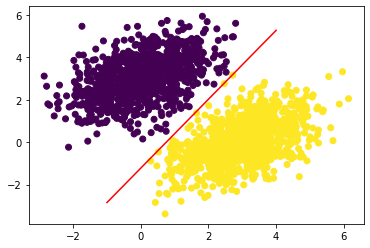

In [23]:
predictions = model(inputs)
x = np.linspace(-1, 4, 100)
y = - W[0]/W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)